<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-48/blob/main/Reto/Entrega1/Reto_Entrega_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

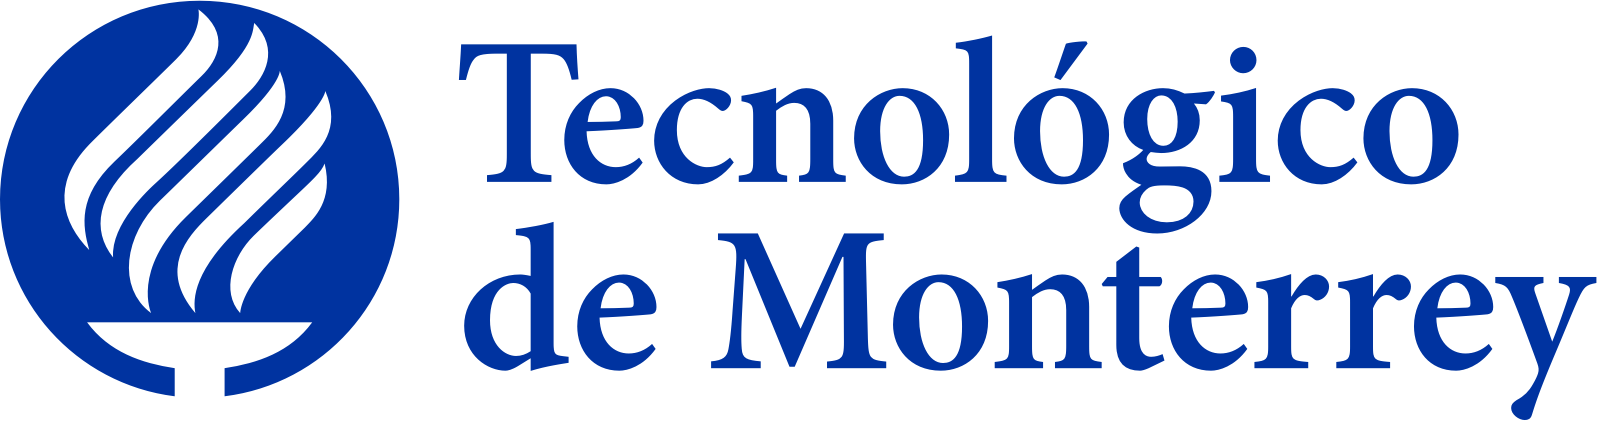

* Nombre de la entrega: Reto Entrega 1: Limpieza, análisis, visualización y kmeans
* Francisco Medellin Zertuche - A01794044
* Roberto Romero Vielma - A00822314 
* Materia:  Ciencia y analítica de datos
* Profesora titular: María de la Paz Rico Fernández
* Profesor tutor: Roberto Antonio Guevara González.
* Fecha: 16/11/2022




# **Elegir una base de datos, ya sea la de aguas superficiales o la de aguas subterráneas.**

In [117]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

file="https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo-48/main/Reto/Entrega1/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv"
dfsw=pd.read_csv(file,encoding = "ISO-8859-1")

El dataset a utilizar es el de aguas subterráneas, dado que presenta una mayor cantidad de datos diferentes a **NaN** en comparación al dataset de aguas superficiales, lo que nos puede ayudar para tener mejores predicciones, a la hora de usar modelos de machine learning.



# **Limpieza de base de datos**

In [118]:
pd.set_option("display.max_columns",None) #mostramos todas las columnas
dfsw.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,NaN,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,NaN,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [119]:
dfsw.info() #obtenemos información de cada columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

Eliminamos el signo ${<}$ de todas las variables ordinales por motivos de practicidad

In [120]:
to_numeric=['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

for i in to_numeric:
  dfsw[i] = dfsw[i].astype("str")
  dfsw[i] = dfsw[i].str.replace("<","0")
  dfsw[i]= dfsw[i].astype("float")

Verificamos cuantos datos vacíos tiene nuestro dataframe

In [121]:
dfsw.isnull().sum().sort_values(ascending=False)

SDT_mg/L                1068
CONTAMINANTES            434
CALIDAD_CONDUC             6
CONDUCT_mS/cm              6
ALC_mg/L                   4
CALIDAD_ALC                4
CALIDAD_SDT_ra             2
SDT_M_mg/L                 2
CALIDAD_SDT_salin          2
CALIDAD_N_NO3              1
CALIDAD_DUR                1
N_NO3_mg/L                 1
DUR_mg/L                   1
CUMPLE_CON_COND            0
CUMPLE_CON_ALC             0
SEMAFORO                   0
CALIDAD_FE                 0
FE_TOT_mg/L                0
CALIDAD_MN                 0
CUMPLE_CON_SDT_ra          0
CUMPLE_CON_SDT_salin       0
CLAVE                      0
CUMPLE_CON_FLUO            0
CUMPLE_CON_DUR             0
CALIDAD_PB                 0
CUMPLE_CON_CF              0
CUMPLE_CON_NO3             0
CUMPLE_CON_AS              0
CUMPLE_CON_CD              0
CUMPLE_CON_CR              0
CUMPLE_CON_HG              0
CUMPLE_CON_PB              0
CUMPLE_CON_MN              0
MN_TOT_mg/L                0
CD_TOT_mg/L   

Usames el siguiente bloque de codigo para conocer la cantidad de diferentes valores que cada columna contiene. Despues clasificarmos la forma en como seran tratados los datos nulos por columna , agregando el nombre de la columna las listas "fill_moda" o "fill_mediana".

In [122]:
fill_moda = ["CALIDAD_ALC","CALIDAD_SDT_ra","CALIDAD_SDT_salin","CALIDAD_N_NO3","CALIDAD_DUR","CONTAMINANTES","CALIDAD_CONDUC"]
fill_mediana = ["CONDUCT_mS/cm","ALC_mg/L","SDT_M_mg/L","N_NO3_mg/L","DUR_mg/L"]
dropna = ["SDT_mg/L"]

Remplazamos por moda

In [123]:
for c in fill_moda:
  dfsw[c].fillna(dfsw[c].mode()[0], inplace=True)

Remplazamos por mediana

In [124]:
for c in fill_mediana:
  dfsw[c].fillna(dfsw[c].median(), inplace=True)

Mostramos la longitud del dataset

In [125]:
len(dfsw)

1068

Como se puede apreciar la columna SDT_mg/L se encuentra vacía en su totalidad, por lo cual se procederá a eliminarla

Usamos el método drop para eliminar la columna con valores vacíos

In [126]:
dfsw.drop("SDT_mg/L",axis=1,inplace=True)

Verificamos que ya no exitan datos nulos en el dataset

In [127]:
dfsw.isnull().sum().sort_values(ascending=False)

CLAVE                   0
SITIO                   0
CALIDAD_CR              0
HG_TOT_mg/L             0
CALIDAD_HG              0
PB_TOT_mg/L             0
CALIDAD_PB              0
MN_TOT_mg/L             0
CALIDAD_MN              0
FE_TOT_mg/L             0
CALIDAD_FE              0
SEMAFORO                0
CONTAMINANTES           0
CUMPLE_CON_ALC          0
CUMPLE_CON_COND         0
CUMPLE_CON_SDT_ra       0
CUMPLE_CON_SDT_salin    0
CUMPLE_CON_FLUO         0
CUMPLE_CON_DUR          0
CUMPLE_CON_CF           0
CUMPLE_CON_NO3          0
CUMPLE_CON_AS           0
CUMPLE_CON_CD           0
CUMPLE_CON_CR           0
CUMPLE_CON_HG           0
CUMPLE_CON_PB           0
CUMPLE_CON_MN           0
CR_TOT_mg/L             0
CALIDAD_CD              0
CD_TOT_mg/L             0
CALIDAD_CONDUC          0
ORGANISMO_DE_CUENCA     0
ESTADO                  0
MUNICIPIO               0
ACUIFERO                0
SUBTIPO                 0
LONGITUD                0
LATITUD                 0
PERIODO     

Como sabemos muchos modelos no toman en cuenta strings como entrada, es por esto que podemos encodificar estas variables con 0 y 1 mediante el metodo get_dummies() para convertir variables categoricas en dummy variables.

In [128]:
dfsw["CONTAMINANTES"].value_counts()

FLUO,                                            512
DT,                                               65
FLUO,AS,                                          51
CF,                                               31
AS,                                               31
                                                ... 
ALC,CONDUC,SDT_ra,SDT_salin,DT,NO3,                1
ALC,CONDUC,SDT_ra,SDT_salin,FLUO,DT,AS,MN,FE,      1
PB,MN,FE,                                          1
ALC,AS,FE,                                         1
ALC,DT,NO3,                                        1
Name: CONTAMINANTES, Length: 126, dtype: int64

In [129]:
dftmp = dfsw["CONTAMINANTES"].str.get_dummies(sep=',')
clean_dfsw = pd.concat([dfsw,dftmp], axis=1)
clean_dfsw.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,ALC,AS,CD,CF,CONDUC,CR,DT,FE,FLUO,HG,MN,NI,NO3,PB,SDT_ra,SDT_salin
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.7320,Potable - Dura,1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,"FLUO,",SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,1.1,Potable - Excelente,5.750110,Potable - Buena calidad,0.0134,Apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250,Potable - Excelente,Verde,"FLUO,",SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,342.0,Excelente para riego,Potable - Dulce,1.8045,Alta,120.7190,Potable - Dura,1.1,Potable - Excelente,1.449803,Potable - Excelente,0.0370,No apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.8790,Potable - Dura,1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250,Potable - Excelente,Verde,"FLUO,",SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,1179.0,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291.0,Aceptable,15.672251,No apta como FAAP,0.0100,Potable - Excelente,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Eliminamos la columna contaminantes, ya que la hemos convertido en columnas dummy

In [130]:
clean_dfsw.drop("CONTAMINANTES",axis=1,inplace=True)

# **Exploración de datos**

In [131]:
df = clean_dfsw.copy()

## **Identificando tendencias centrales promedio, media y mediana de los datos.** 

In [132]:
df.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L,ALC,AS,CD,CF,CONDUC,CR,DT,FE,FLUO,HG,MN,NI,NO3,PB,SDT_ra,SDT_salin
count,1068.000000,1068.000000,1068.0,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,-101.891007,23.163618,2020.0,235.558455,1137.133052,895.454185,1.075600,347.842003,355.490356,4.317663,0.019618,0.003030,0.013276,0.000557,0.005282,0.072478,0.410387,0.055243,0.118914,0.001873,0.057116,0.115169,0.014045,0.211610,0.127341,0.586142,0.000936,0.080524,0.001873,0.076779,0.011236,0.066479,0.066479
std,6.703263,3.887670,0.0,116.661485,1242.292889,2748.991295,1.924278,359.514579,2052.457014,8.341504,0.035209,0.000894,0.154391,0.000467,0.003254,0.376512,5.537974,0.228562,0.323839,0.043254,0.232173,0.319375,0.117731,0.408641,0.333511,0.492754,0.030600,0.272231,0.043254,0.266365,0.105452,0.249235,0.249235
min,-116.664250,14.561150,2020.0,26.640000,50.400000,25.000000,0.200000,20.000000,1.100000,0.020000,0.010000,0.003000,0.005000,0.000500,0.005000,0.001500,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-105.388865,20.212055,2020.0,164.048750,505.500000,337.700000,0.267175,121.274100,1.100000,0.650932,0.010000,0.003000,0.005000,0.000500,0.005000,0.001500,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,550.400000,0.503500,245.335800,1.100000,2.080932,0.010000,0.003000,0.005000,0.000500,0.005000,0.001500,0.046960,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-98.974716,25.510285,2020.0,292.423750,1321.250000,915.900000,1.139850,453.930000,13.250000,5.200047,0.010000,0.003000,0.005000,0.000500,0.005000,0.009947,0.173380,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,82170.000000,34.803300,3810.692200,24196.000000,121.007813,0.452200,0.032110,5.003200,0.014150,0.080900,8.982000,178.615000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Identificamos la media de los datos

In [133]:
df.mean()

LONGITUD               -101.891007
LATITUD                  23.163618
PERIODO                2020.000000
ALC_mg/L                235.558455
CONDUCT_mS/cm          1137.133052
SDT_M_mg/L              895.454185
FLUORUROS_mg/L            1.075600
DUR_mg/L                347.842003
COLI_FEC_NMP/100_mL     355.490356
N_NO3_mg/L                4.317663
AS_TOT_mg/L               0.019618
CD_TOT_mg/L               0.003030
CR_TOT_mg/L               0.013276
HG_TOT_mg/L               0.000557
PB_TOT_mg/L               0.005282
MN_TOT_mg/L               0.072478
FE_TOT_mg/L               0.410387
ALC                       0.055243
AS                        0.118914
CD                        0.001873
CF                        0.057116
CONDUC                    0.115169
CR                        0.014045
DT                        0.211610
FE                        0.127341
FLUO                      0.586142
HG                        0.000936
MN                        0.080524
NI                  

## **Identificando medidas de dispersión, máximo, mínimo.**

### **Varianza**

In [134]:
df.var()

LONGITUD               4.493373e+01
LATITUD                1.511398e+01
PERIODO                0.000000e+00
ALC_mg/L               1.360990e+04
CONDUCT_mS/cm          1.543292e+06
SDT_M_mg/L             7.556953e+06
FLUORUROS_mg/L         3.702848e+00
DUR_mg/L               1.292507e+05
COLI_FEC_NMP/100_mL    4.212580e+06
N_NO3_mg/L             6.958068e+01
AS_TOT_mg/L            1.239698e-03
CD_TOT_mg/L            7.996350e-07
CR_TOT_mg/L            2.383666e-02
HG_TOT_mg/L            2.182006e-07
PB_TOT_mg/L            1.059094e-05
MN_TOT_mg/L            1.417616e-01
FE_TOT_mg/L            3.066915e+01
ALC                    5.224052e-02
AS                     1.048715e-01
CD                     1.870904e-03
CF                     5.390433e-02
CONDUC                 1.020003e-01
CR                     1.386066e-02
DT                     1.669878e-01
FE                     1.112293e-01
FLUO                   2.428068e-01
HG                     9.363296e-04
MN                     7.410

### **Desviación estándar**

In [135]:
df.std()

LONGITUD                  6.703263
LATITUD                   3.887670
PERIODO                   0.000000
ALC_mg/L                116.661485
CONDUCT_mS/cm          1242.292889
SDT_M_mg/L             2748.991295
FLUORUROS_mg/L            1.924278
DUR_mg/L                359.514579
COLI_FEC_NMP/100_mL    2052.457014
N_NO3_mg/L                8.341504
AS_TOT_mg/L               0.035209
CD_TOT_mg/L               0.000894
CR_TOT_mg/L               0.154391
HG_TOT_mg/L               0.000467
PB_TOT_mg/L               0.003254
MN_TOT_mg/L               0.376512
FE_TOT_mg/L               5.537974
ALC                       0.228562
AS                        0.323839
CD                        0.043254
CF                        0.232173
CONDUC                    0.319375
CR                        0.117731
DT                        0.408641
FE                        0.333511
FLUO                      0.492754
HG                        0.030600
MN                        0.272231
NI                  

### **Máximo**

In [136]:
numerical_columns=["ALC_mg/L","CONDUCT_mS/cm","SDT_M_mg/L","FLUORUROS_mg/L","DUR_mg/L","COLI_FEC_NMP/100_mL","N_NO3_mg/L","AS_TOT_mg/L","CD_TOT_mg/L","CR_TOT_mg/L","HG_TOT_mg/L","PB_TOT_mg/L","PB_TOT_mg/L","FE_TOT_mg/L"] #definimos las columnas 

max=df[numerical_columns].max()

print(max)

ALC_mg/L                1650.000000
CONDUCT_mS/cm          18577.000000
SDT_M_mg/L             82170.000000
FLUORUROS_mg/L            34.803300
DUR_mg/L                3810.692200
COLI_FEC_NMP/100_mL    24196.000000
N_NO3_mg/L               121.007813
AS_TOT_mg/L                0.452200
CD_TOT_mg/L                0.032110
CR_TOT_mg/L                5.003200
HG_TOT_mg/L                0.014150
PB_TOT_mg/L                0.080900
PB_TOT_mg/L                0.080900
FE_TOT_mg/L              178.615000
dtype: float64


### **Mínimo**


In [137]:
min=df[numerical_columns].min()

print(min)

ALC_mg/L               26.6400
CONDUCT_mS/cm          50.4000
SDT_M_mg/L             25.0000
FLUORUROS_mg/L          0.2000
DUR_mg/L               20.0000
COLI_FEC_NMP/100_mL     1.1000
N_NO3_mg/L              0.0200
AS_TOT_mg/L             0.0100
CD_TOT_mg/L             0.0030
CR_TOT_mg/L             0.0050
HG_TOT_mg/L             0.0005
PB_TOT_mg/L             0.0050
PB_TOT_mg/L             0.0050
FE_TOT_mg/L             0.0250
dtype: float64


### **Rango estadístico**


In [138]:
rango=max-min
print(rango)

ALC_mg/L                1623.360000
CONDUCT_mS/cm          18526.600000
SDT_M_mg/L             82145.000000
FLUORUROS_mg/L            34.603300
DUR_mg/L                3790.692200
COLI_FEC_NMP/100_mL    24194.900000
N_NO3_mg/L               120.987813
AS_TOT_mg/L                0.442200
CD_TOT_mg/L                0.029110
CR_TOT_mg/L                4.998200
HG_TOT_mg/L                0.013650
PB_TOT_mg/L                0.075900
PB_TOT_mg/L                0.075900
FE_TOT_mg/L              178.590000
dtype: float64


### **Coeficiente de variación**

In [139]:
import numpy as np

cv=lambda x:np.std(x,ddof=1)/np.mean(x*100) #con esta línea calculamos el coeficiente de variación

df[numerical_columns].apply(cv)

ALC_mg/L               0.004953
CONDUCT_mS/cm          0.010925
SDT_M_mg/L             0.030699
FLUORUROS_mg/L         0.017890
DUR_mg/L               0.010336
COLI_FEC_NMP/100_mL    0.057736
N_NO3_mg/L             0.019319
AS_TOT_mg/L            0.017947
CD_TOT_mg/L            0.002952
CR_TOT_mg/L            0.116298
HG_TOT_mg/L            0.008381
PB_TOT_mg/L            0.006162
PB_TOT_mg/L            0.006162
FE_TOT_mg/L            0.134945
dtype: float64

## **Identificar medidas de posición no centrales , cuartiles , outliers**

### **Boxplot**

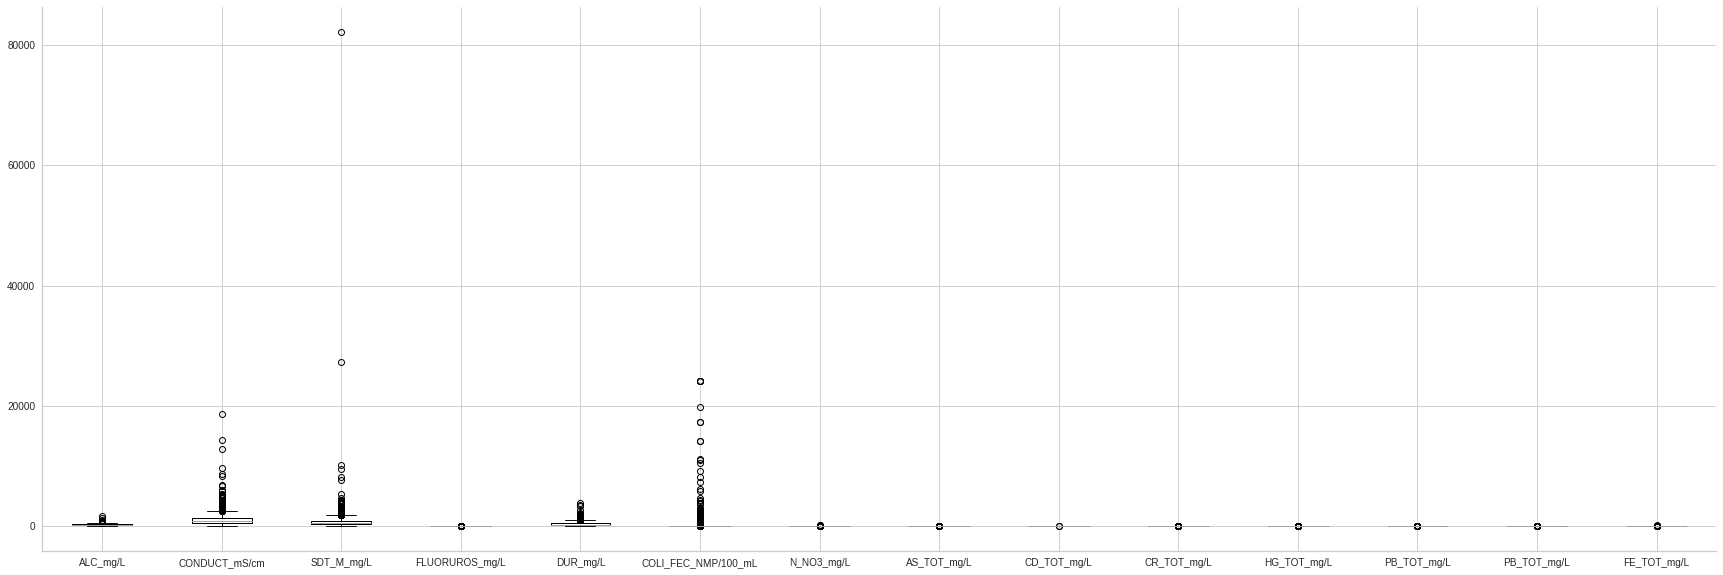

In [140]:
import matplotlib.pyplot as plt
df[numerical_columns].boxplot(figsize=(30,10))


### **Percentiles**

In [141]:
percentiles=list(np.round(np.linspace(0.01,0.99,99),2))
df[numerical_columns].quantile(percentiles, axis = 0)

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,PB_TOT_mg/L,FE_TOT_mg/L
0.01,61.79370,177.020,146.020,0.200000,20.000000,1.10,0.020000,0.010000,0.003,0.005000,0.000500,0.005000,0.005000,0.025000
0.02,73.08840,199.482,163.472,0.200000,20.000000,1.10,0.020000,0.010000,0.003,0.005000,0.000500,0.005000,0.005000,0.025000
0.03,81.76240,222.000,176.006,0.200000,26.017088,1.10,0.020000,0.010000,0.003,0.005000,0.000500,0.005000,0.005000,0.025000
0.04,89.87160,241.000,189.952,0.200000,37.045184,1.10,0.020000,0.010000,0.003,0.005000,0.000500,0.005000,0.005000,0.025000
0.05,93.36250,268.000,202.180,0.200000,41.563200,1.10,0.020000,0.010000,0.003,0.005000,0.000500,0.005000,0.005000,0.025000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.95,405.86175,2896.500,2285.150,3.752120,996.390000,1116.90,14.012630,0.067555,0.003,0.021442,0.000736,0.005000,0.005000,0.924153
0.96,416.12160,3258.800,2421.840,4.189092,1082.690896,1720.64,16.226220,0.075460,0.003,0.023951,0.000873,0.005000,0.005000,1.157000
0.97,448.94900,3665.440,2785.280,4.848784,1180.178604,2400.00,19.435000,0.105051,0.003,0.033490,0.001170,0.005000,0.005000,1.418991
0.98,514.16400,4123.200,3156.380,5.213166,1346.220400,3798.54,25.007595,0.122098,0.003,0.040392,0.001347,0.007070,0.007070,1.932700


### **Deciles**

In [142]:
decils=list(np.round(np.linspace(0.01,0.9,9),1))
df[numerical_columns].quantile(decils, axis = 0)

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,PB_TOT_mg/L,FE_TOT_mg/L
0.0,26.6400,50.4,25.00,0.20000,20.00000,1.1,0.020000,0.01000,0.003,0.005000,0.0005,0.005,0.005,0.025000
0.1,116.5100,333.7,242.54,0.20000,68.02017,1.1,0.057088,0.01000,0.003,0.005000,0.0005,0.005,0.005,0.025000
0.2,150.9760,448.4,306.44,0.23688,102.41554,1.1,0.337504,0.01000,0.003,0.005000,0.0005,0.005,0.005,0.025000
0.3,176.5800,556.2,375.06,0.30161,138.90460,1.1,0.853713,0.01000,0.003,0.005000,0.0005,0.005,0.005,0.025000
0.5,215.5275,815.0,550.40,0.50350,245.33580,1.1,2.080932,0.01000,0.003,0.005000,0.0005,0.005,0.005,0.046960
0.6,242.0840,994.2,660.40,0.68950,317.13920,1.1,2.967577,0.01000,0.003,0.005000,0.0005,0.005,0.005,0.072400
0.7,274.3770,1203.9,817.00,0.95134,389.84400,4.0,4.212760,0.01000,0.003,0.005000,0.0005,0.005,0.005,0.126980
0.8,309.4200,1471.2,1073.60,1.39970,524.54640,40.0,5.845212,0.01340,0.003,0.005000,0.0005,0.005,0.005,0.219204
0.9,357.4200,2167.8,1627.58,2.42945,746.07000,240.3,9.109117,0.03273,0.003,0.012459,0.0005,0.005,0.005,0.384950


### **Cuartiles**

In [143]:
quantiles=list(np.round(np.linspace(0.25,0.75,3),2))
df[numerical_columns].quantile(quantiles, axis = 0)

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,PB_TOT_mg/L,FE_TOT_mg/L
0.25,164.04875,505.50,337.7,0.267175,121.2741,1.10,0.650932,0.01,0.003,0.005,0.0005,0.005,0.005,0.02500
0.50,215.52750,815.00,550.4,0.503500,245.3358,1.10,2.080932,0.01,0.003,0.005,0.0005,0.005,0.005,0.04696
0.75,292.42375,1321.25,915.9,1.139850,453.9300,13.25,5.200047,0.01,0.003,0.005,0.0005,0.005,0.005,0.17338


Estandarizamos los datos para una mejor visualizacion del boxplot.

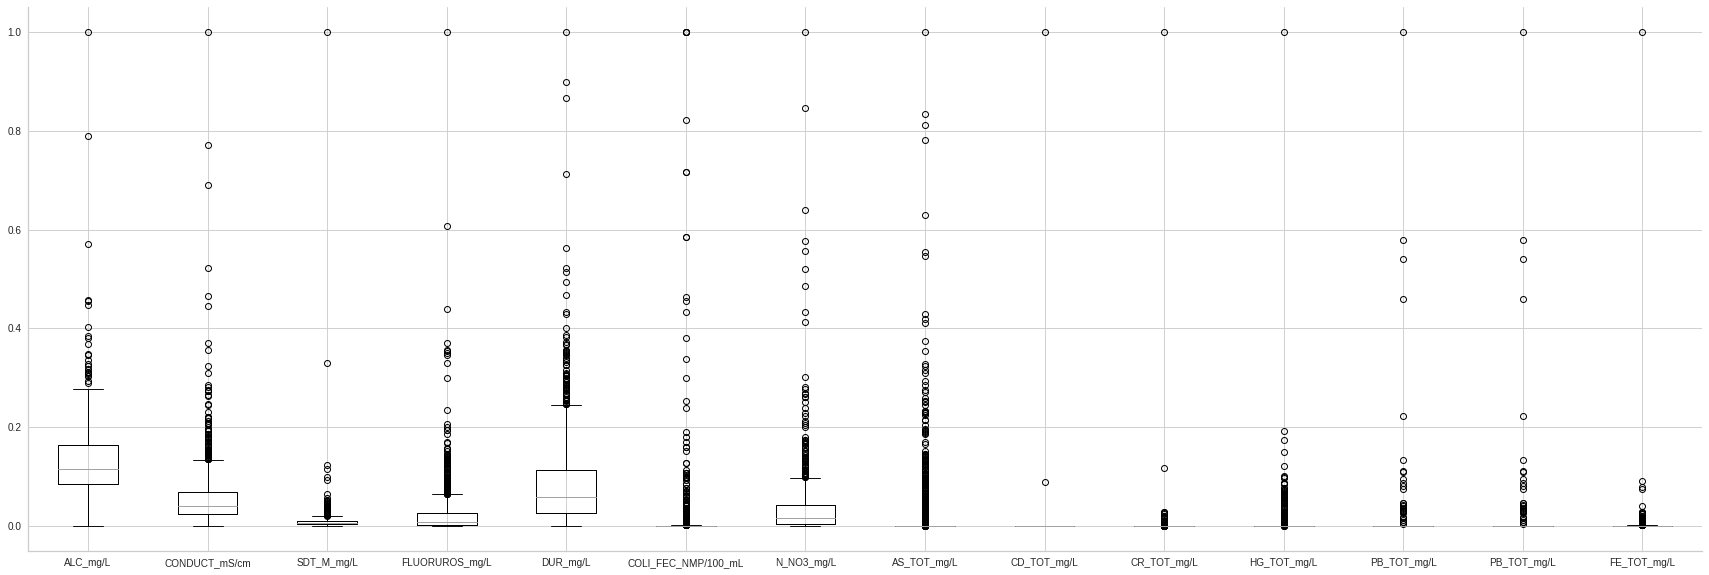

In [144]:
from sklearn.preprocessing import MinMaxScaler

df_outlier = df[numerical_columns].copy()
scaler = MinMaxScaler()
df_outlier = scaler.fit_transform(df_outlier)

df_outlier=pd.DataFrame(df_outlier)
df_outlier.columns= numerical_columns
df_outlier.boxplot(figsize=(30,10))

### **Visualización de la distribución de atributos con histograma**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5f39051d0>,
      dtype=object)

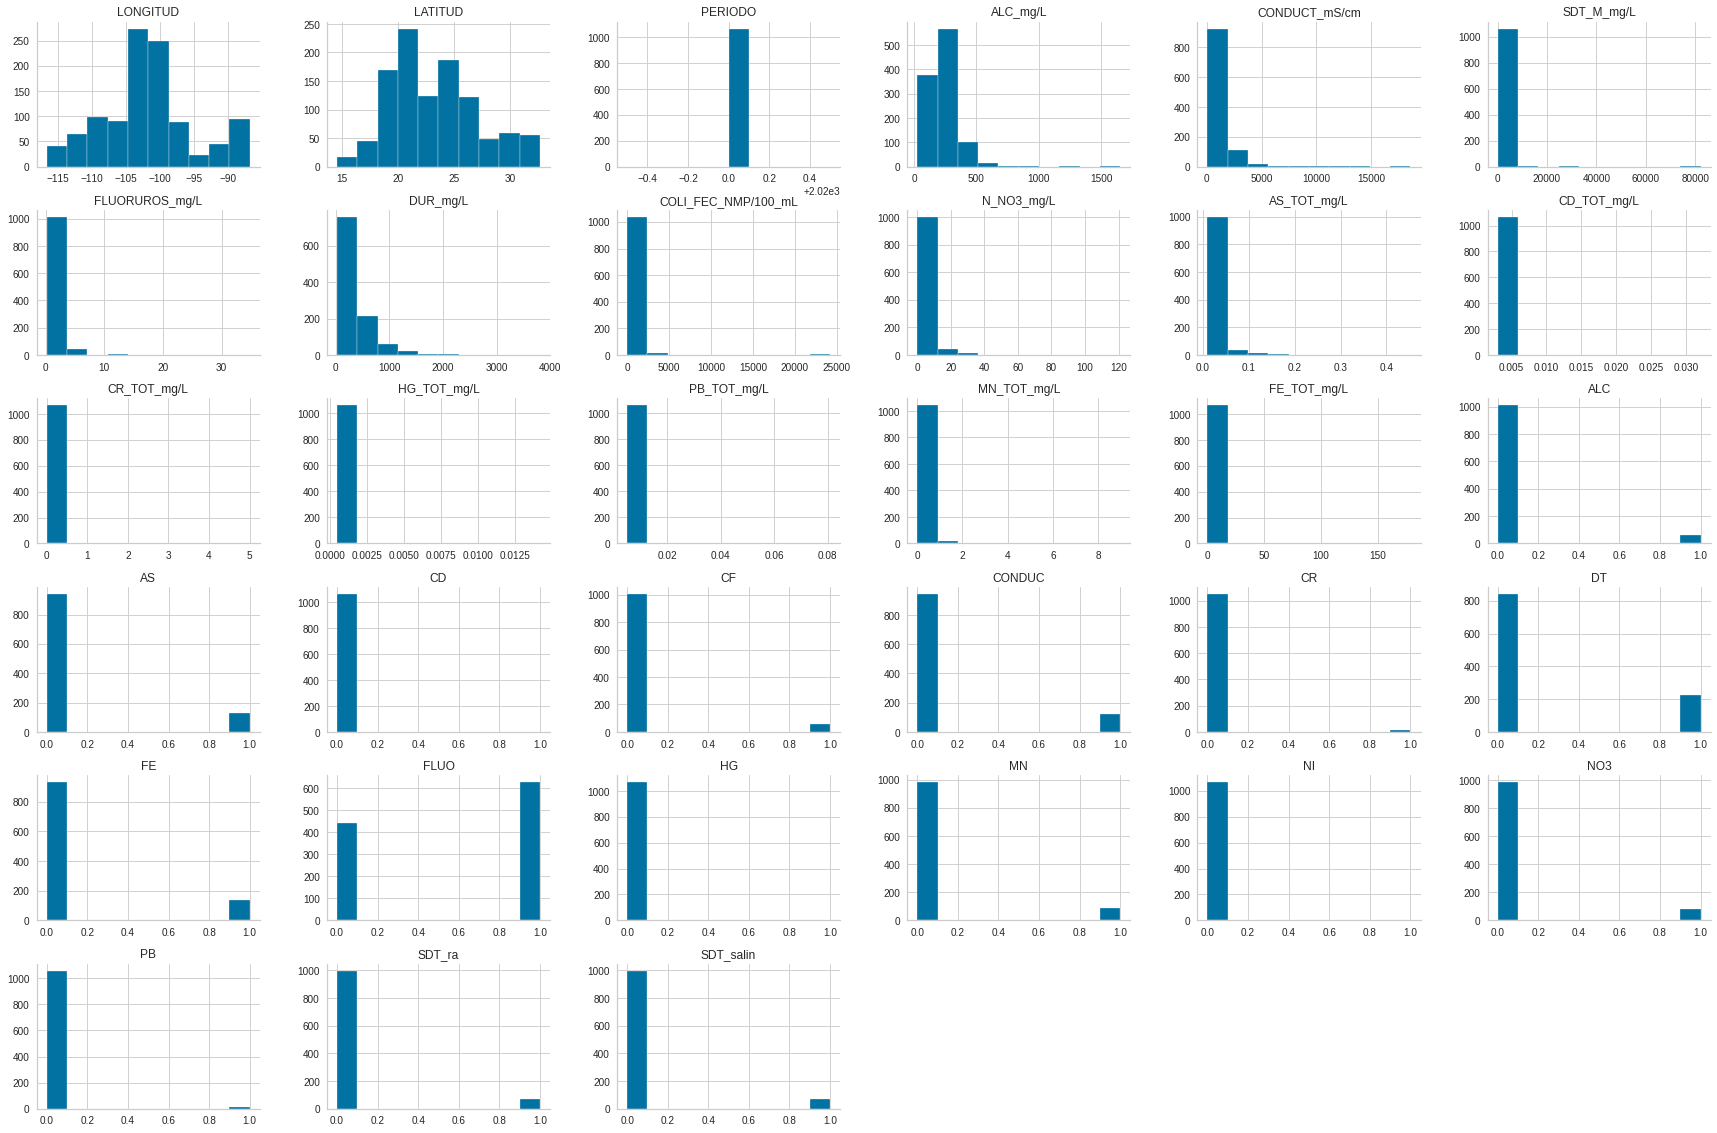

In [145]:
df.hist(figsize=(30,20))

## **Identificar correlaciones**

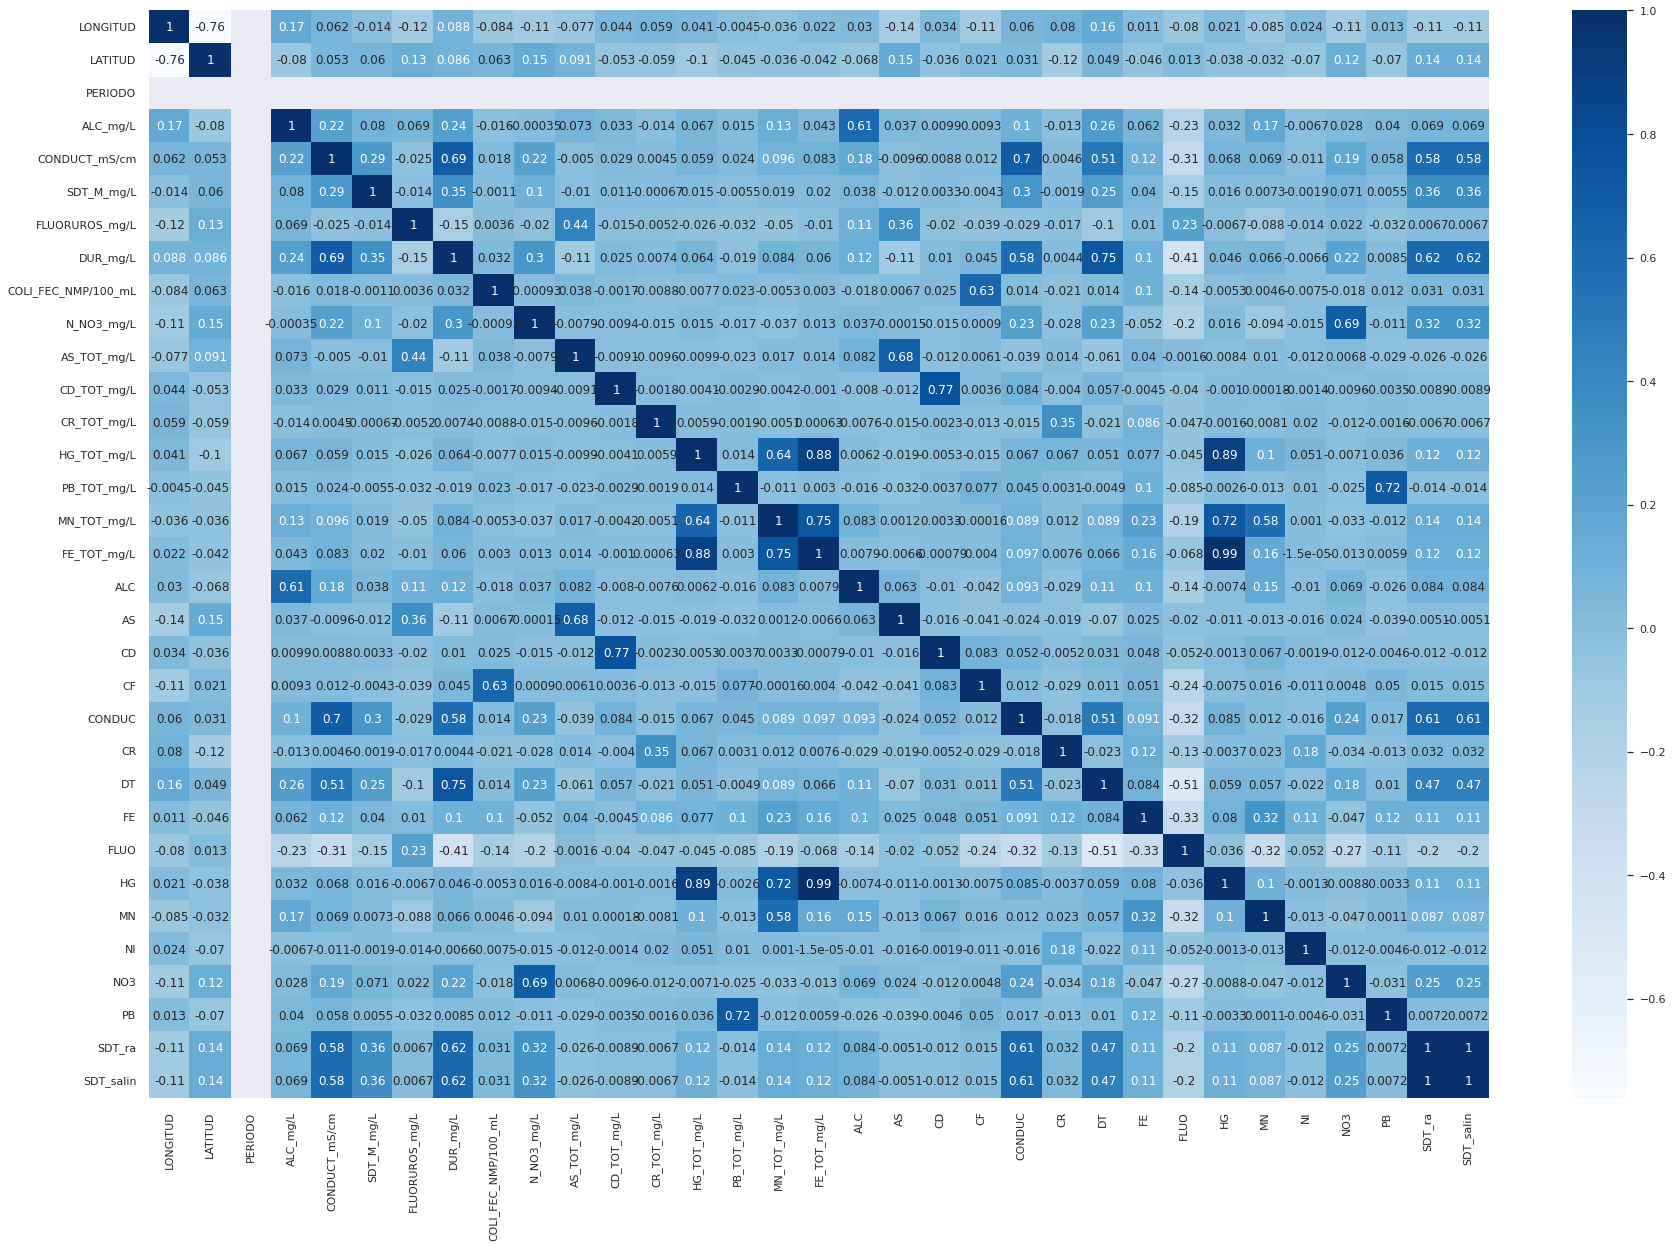

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(30,20)})
ax = sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.show()


## **Preparar los datos**
Una vez explorados los datos, creamos nuestro dataframe a utilizar en el resto de la actividad.

In [147]:
df = clean_dfsw.copy()

# **Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K-means.**


Análisis visual de  los cuerpos de agua y su ubicacion geográfica en el país.

In [148]:
latlong=df[["LATITUD","LONGITUD"]] #creamos un nuevo dataframe con la latitud y la longitud

Utilizamos librerías para visualizar mapas geográficos

In [149]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [150]:
import geopandas as gpd #librería para plots geográficos
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
import qeds
qeds.themes.mpl_style() 

RcParams({'axes.edgecolor': '#e1e1e1',
          'axes.facecolor': '#efefef',
          'axes.grid': True,
          'axes.labelcolor': '#444444',
          'axes.labelsize': 'large',
          'axes.linewidth': 2.0,
          'axes.prop_cycle': cycler('color', ['#165aa7', '#cb495c', '#fec630', '#bb60d5', '#f47915', '#06ab54', '#002070', '#b27d12', '#007030']),
          'axes.spines.right': False,
          'axes.spines.top': False,
          'axes.titlesize': 'x-large',
          'figure.facecolor': '#f7f7f7',
          'font.family': ['Source Sans Pro', 'DejaVu Sans'],
          'font.size': 14.0,
          'grid.alpha': 0.9,
          'grid.color': '#e1e1e1',
          'grid.linewidth': 1.0,
          'lines.color': '#e1e1e1',
          'text.color': '#444444',
          'xtick.color': '#444444',
          'xtick.direction': 'out',
          'xtick.major.size': 10.0,
          'ytick.color': '#444444',
          'ytick.direction': 'out',
          'ytick.major.size': 10.0})

Creamos una nueva columna para generar las coordenadas a graficar

In [151]:
dfmap = df.copy()
dfmap["COORDENADAS"] = list(zip(dfmap.LONGITUD, dfmap.LATITUD))
dfmap["COORDENADAS"] = dfmap["COORDENADAS"].apply(Point)

Visualizamos el agua que se encuentra en mantos acuíferos subterráneos

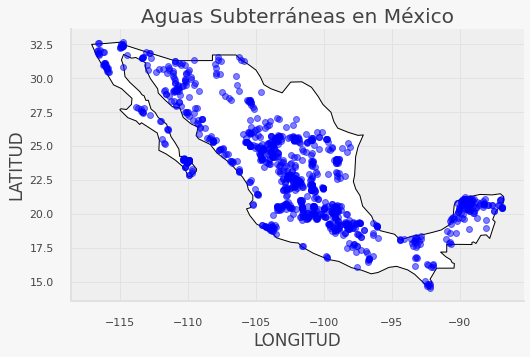

In [152]:
gdf = gpd.GeoDataFrame(dfmap, geometry="COORDENADAS")
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

fig, gax = plt.subplots(figsize=(10,5))

# By only plotting rows in which the continent is 'Mexico' we only plot, well,
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

gdf.plot(ax=gax, color='blue', alpha = 0.5, legend=True)

gax.set_xlabel('LONGITUD')
gax.set_ylabel('LATITUD')
gax.set_title('Aguas Subterráneas en México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

Ahora mostramos la calidad del agua dependiendo del semáforo

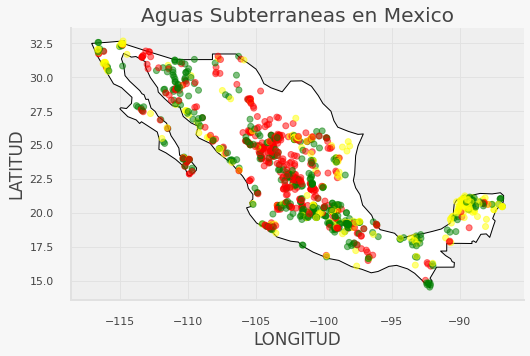

In [153]:
gdf = gpd.GeoDataFrame(dfmap, geometry="COORDENADAS")
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

fig, gax = plt.subplots(figsize=(10,5))

# By only plotting rows in which the continent is 'Mexico' we only plot, well,
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

def semaforo_ingles():
  l = []
  for r in gdf["SEMAFORO"]:
    if r == "Amarillo":
      l.append("yellow")
    if r == "Rojo":
      l.append("red")
    if r == "Verde":
      l.append("green")
  return l
  
gdf["SEMAFORO_EN"] = semaforo_ingles()

gdf.plot(ax=gax, column = gdf["SEMAFORO_EN"] ,color=[x for x in gdf.SEMAFORO_EN] , alpha = 0.5, legend=True)

gax.set_xlabel('LONGITUD')
gax.set_ylabel('LATITUD')
gax.set_title('Aguas Subterraneas en Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

<h3>Ahora que ya hemos podido ver la distribución de los cuerpos de agua con su respectivo color de semáforo, realizaremos una implementacion del modelo K-Means en los datos.<h3>

<h3>Esto con el propósito de hacer un análisis visual para encontrar si existe relación entre la calidad de agua y su ubicación geográfica agrupada mediante K-means.<h3>

## **K-Means**

Entrenamos al modelo, y utilizamos el metodo de codo para obtener la cantidad optima de klusters.

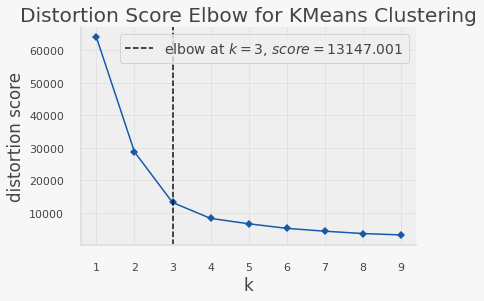

In [154]:
from sklearn.cluster import KMeans #módulo KMeans
from yellowbrick.cluster import KElbowVisualizer #Visualizador del método del codo


model = KMeans(init="random",max_iter=500,random_state=7) #creamos el modelo
plot = KElbowVisualizer(model, k=(1,10),timings=False) # creamos el objeto con el que haremos el plot

plot.fit(latlong) #entrenamos al modelo con nuestros datos
plot.show()

Visualmente podemos observar que la K optima es igual a 3, creamos una función para usar el kmeans que queramos

In [155]:
# Entrenamos con la K optima


def Kmeans(n):
  best_center=KMeans(n_clusters=n,init="random",max_iter=500,random_state=7)
  best_center.fit(latlong) #entrenamos el modelo con nuestras coordenadas
  centers = best_center.cluster_centers_ #obtenemos los centros
  labels=best_center.labels_ #obtenemos las etiquetas
  return centers, labels

centers,labels=Kmeans(3) #guardamos los centros dentro de la variable centers, seguido de las etiquetas en la variable lables

  Visualizamos las coordenadas de los centros de los clusters.

In [156]:
print(centers)

[[  22.25422556 -101.7221275 ]
 [  19.47336214  -90.7284703 ]
 [  28.43820216 -110.79448776]]


Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.


Visualizamos en un mapa las latitudes y longitudes de los cuerpos de agua con sus respectivos centros K-Means. Para ello usamos creamos una función para graficar las coordenadas de acuerdo al color del semáforo y a los centros obtenidos con K-means.


In [157]:
def plot_centers():
  locations=pd.DataFrame(centers, columns = ["Latitude","Longitude"])

  locations["COORDENADAS"] = list(zip(locations.Longitude, locations.Latitude))
  locations["COORDENADAS"] = locations["COORDENADAS"].apply(Point)

  gdf = gpd.GeoDataFrame(locations, geometry="COORDENADAS")
  gdf2 = gpd.GeoDataFrame(dfmap, geometry="COORDENADAS")


  def semaforo_ingles():
    l = []
    for r in gdf2["SEMAFORO"]:
      if r == "Amarillo":
        l.append("yellow")
      if r == "Rojo":
        l.append("red")
      if r == "Verde":
        l.append("green")
    return l
    
  gdf2["SEMAFORO_EN"] = semaforo_ingles()


  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
  world = world.set_index("iso_a3")

  fig, gax = plt.subplots(figsize=(10,5))

  # By only plotting rows in which the continent is 'Mexico' we only plot, well,
  world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

  gdf2.plot(ax=gax, column = gdf2["SEMAFORO_EN"] ,color=[x for x in gdf2.SEMAFORO_EN] , alpha = 0.5, legend=True)
  gdf.plot(ax=gax, color='black', legend=True,markersize=200)

  gax.set_xlabel('LONGITUD')
  gax.set_ylabel('LATITUD')
  gax.set_title('Aguas Subterraneas en Mexico')

  gax.spines['top'].set_visible(False)
  gax.spines['right'].set_visible(False)

  plt.show()
  return locations #regresamos las locaciones, dado que las necesitaremos en el otro plot

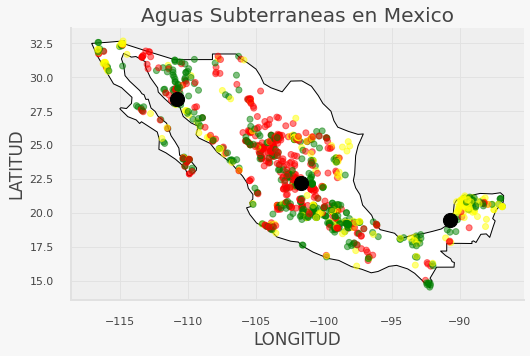

In [158]:
locations=plot_centers()

# **Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.**

Visualizamos como quedan agrupados los centros, para ello creamos una función para graficar las coordenadas agrupadas de acuerdo a los centros obtenidos por medio de K-means.

In [159]:
def plot_grouped_coordinates():
  cluster=pd.DataFrame(labels,columns=["CLUSTER"]) #creamos un dataframe con la etiqueta de cada punto geográfico
  kmeans=pd.concat([latlong,cluster],axis=1) #concatenamos las coordenadas, con el cluster al que pertenecen

  kmeans["COORDENADAS"] = list(zip(kmeans["LONGITUD"], kmeans["LATITUD"])) #creamos puntos geográficos con las columnas latitud y longitud
  kmeans["COORDENADAS"] = kmeans["COORDENADAS"].apply(Point)

  gdf = gpd.GeoDataFrame(locations, geometry="COORDENADAS") #locations son los centros
  gdf2 = gpd.GeoDataFrame(kmeans, geometry="COORDENADAS") #coordenadas agrupadas con kmeans


  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
  world = world.set_index("iso_a3")

  fig, gax = plt.subplots(figsize=(10,5))

  # By only plotting rows in which the continent is 'Mexico' we only plot, well,
  world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

  gdf2.plot(ax=gax, column = "CLUSTER" , alpha = 0.5,cmap="Paired")
  gdf.plot(ax=gax, color='black', legend=True,markersize=200)


  gax.set_xlabel('LONGITUD')
  gax.set_ylabel('LATITUD')
  gax.set_title('Aguas Subterráneas en México')

  gax.spines['top'].set_visible(False)
  gax.spines['right'].set_visible(False)

  plt.show()

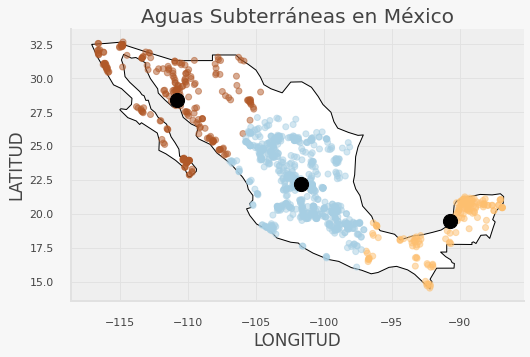

In [160]:
plot_grouped_coordinates()

Tal como se puede visualizar, el método del codo, no nos será útil para determinar el número de clusters o centros necesarios para explicar la calidad del agua dependiendo de las coordenadas geográficas. Por lo cual vamos a probar con diferentes valores dentro del parámetro n_clusters para ver si alguno, se adapta mejor a la información proporcionada.

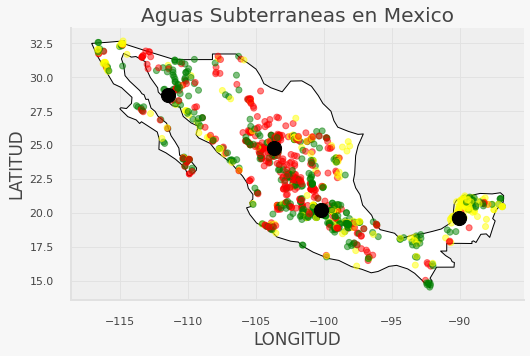

In [161]:
centers,labels=Kmeans(4) #usamos la función previamente creada para obtener los clusters
locations=plot_centers() #graficamos los clusters 

Visualizamos ahora como quedan agrupadas las coordenadas

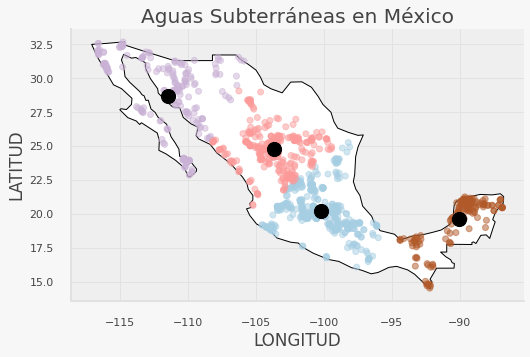

In [162]:
plot_grouped_coordinates()

Con 4 clusters queda mejor explicada la calidad del agua dependiendo de la zona, por último vamos a intentar ahora con 10 clusters

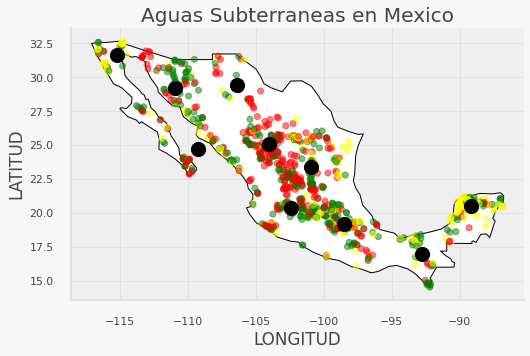

In [163]:
centers,labels=Kmeans(10)
locations=plot_centers()

Vemos como quedan agrupados los datos

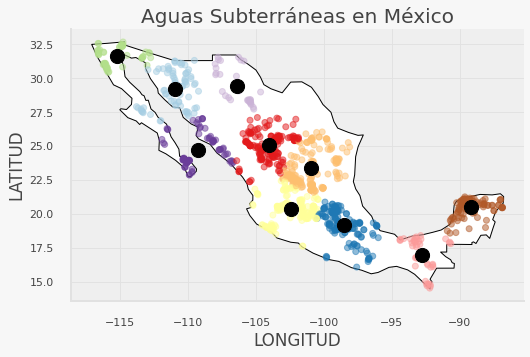

In [164]:
plot_grouped_coordinates()

**Análisis de 3 y 4 clusters**
- Mediante el análisis visual podemos observar que en los modelos de 3 y 4 clusters no se observa relación alguna entre el semáforo y la agrupación de los cuerpos de agua.
- En el cluster de la península de Yucatán se observa el mejor agrupamiento, al tener en su mayoría amarillo o verde en sus cuerpos de agua.

**Análisis de 10 clusters**
- Mediante el análisis visual llegamos a la misma conclusión de que no existe relación entre la calidad del agua y su ubicación geográfica agrupada por medio de K-Means. 
- Las clases de la variable objetivo "semáforo" se encuentran muy juntas. Por lo que una opción para mejorar la clasificación es utilizar modelos supervisados de tipo Ensamble.
